In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor  
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
df = pd.read_csv('C:\A1\journey_df_train.csv')        
df = df.drop(labels=['CUST_RK'],axis = 1)             #進行資料整理，先將不重要的欄位先刪掉
df = df.drop(labels=['EVENT_DT'],axis = 1)
df = df.drop(labels=['Unnamed: 0'],axis = 1)

df

,EVENT,EVENT_TYPE1,MONTH_SINCE_LAST_BUY
0,2,63,-1
1,2,74,-1
2,5,6,-1
3,5,23,-1
4,5,16,-1
...,...,...,...
272497,2,41,3
272498,2,65,3
272499,2,43,-1
272500,2,65,-1


In [41]:
y = df.drop(labels = ['EVENT','EVENT_TYPE1'],axis=1)    #利用刪除的方式去留下真正想要的欄位
X = df.drop(labels=['MONTH_SINCE_LAST_BUY'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)   #將資料拆分成訓練跟測試集

In [42]:
print(X_train)

        EVENT  EVENT_TYPE1
48074       3           70
36854       2           37
172482      6            1
139713      5            6
45930       3           70
...       ...          ...
119879      3           70
259178      4           21
131932      2           74
146867      6            1
121958      5            6

[190751 rows x 2 columns]


In [16]:
print(y_train)

        MONTH_SINCE_LAST_BUY
48074                     -1
36854                     -1
172482                    -1
139713                    -1
45930                     -1
...                      ...
119879                    -1
259178                     3
131932                    -1
146867                    -1
121958                    -1

[190751 rows x 1 columns]


In [45]:
from xgboost import XGBClassifier
xgboostmodel = XGBClassifier(n_estimators = 100, learning_rate=0.1)  
xgboostmodel.fit(X_train,y_train)
predicted = xgboostmodel.predict(X_train)

C:\Users\linnn\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [46]:
#預測成功的比例
print('訓練集:',xgboostmodel.score(X_train,y_train))
print('訓練集:',xgboostmodel.score(X_test,y_test))

訓練集: 0.8715445790585633
訓練集: 0.873665153943071


特徵重要程度: [0.7891211  0.21087888]


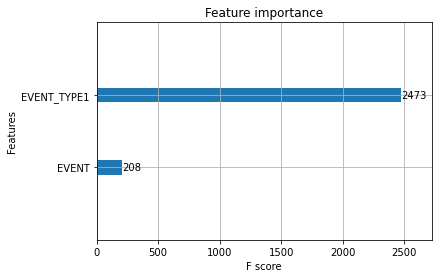

In [22]:
from xgboost import plot_importance
from xgboost import plot_tree
plot_importance(xgboostmodel)
print('特徵重要程度:',xgboostmodel.feature_importances_)

In [23]:
#真實資料
df_train = pd.DataFrame(X_train)    #建立訓練集的DataFrame
df_train['EVENT_TYPE1'] = y_train

df_test = pd.DataFrame(X_test)      #建立測試集的DataFrame
df_test['EVENT_TYPE1'] = y_test

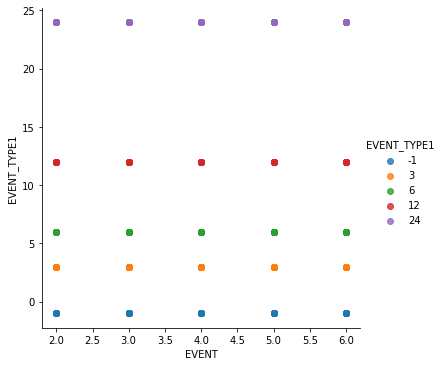

In [27]:
#真實的資料
sns.lmplot('EVENT','EVENT_TYPE1',hue = 'EVENT_TYPE1' ,data = df_train, fit_reg = False)

C:\Users\linnn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


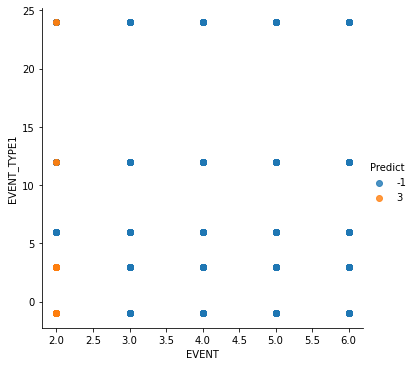

In [28]:
#預測資料
df_train['Predict'] = predicted
sns.lmplot('EVENT','EVENT_TYPE1',hue = 'Predict' ,data = df_train, fit_reg = False)
plt.show()